# Assignment 1

**Submission deadlines:** 
- get at least 4 points by Tuesday, 9.03.2021
- remaining points: last lab session before or on Tuesday, 16.03.2021

**Points:** Aim to get 8 out of 12 possible points

## Submission instructions
The class is held remotely. To sumbmit your solutions please show the notebook over the video call. Make sure you know all the questions and asnwers, and that the notebook contains results (before presentation do `Runtime -> Restar and run all`)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or lare ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep digmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (thet they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

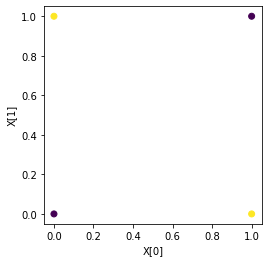

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # DONE for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)

    def forward(self, X, Y=None, do_backward=False):
        # DONE Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X@self.W1.T + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = O1@self.W2.T + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = - Y*np.log(O2) - (1 - Y)*np.log(1.0 - O2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # DONE in Problem 2:
            # fill in the gradient computation
            # Please note, thate there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X
            
        return O2, loss

In [ ]:
# DONE Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=np.float64)
net.W1 = np.array([[10, 10],
                   [10, 10]])
net.b1 = np.array([-5, -15])
net.W2 = np.array([[10, -10]])
net.b2 = np.array([-5])

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net.forward(X, Y, do_backward=False)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.0071527881888964915
XORnet([0. 1.]) = 0.9923558641717396
XORnet([1. 0.]) = 0.9923558641717396
XORnet([1. 1.]) = 0.0071527881888964785


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=np.float64)

alpha = 10  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.7261148332268009
after 5000 steps 	loss=0.0001395553334466925
after 10000 steps 	loss=6.802398878263961e-05
after 15000 steps 	loss=4.484312839341445e-05
after 20000 steps 	loss=3.3402678725411624e-05
after 25000 steps 	loss=2.659403802934256e-05
after 30000 steps 	loss=2.2081123668130448e-05
after 35000 steps 	loss=1.8871836320110715e-05
after 40000 steps 	loss=1.647338379260372e-05
after 45000 steps 	loss=1.4613385496507238e-05
after 50000 steps 	loss=1.312908599469023e-05
after 55000 steps 	loss=1.1917269532896058e-05
after 60000 steps 	loss=1.0909327471470327e-05
after 65000 steps 	loss=1.0057882597411025e-05
after 70000 steps 	loss=9.329170058830274e-06
after 75000 steps 	loss=8.6984785399205e-06
after 80000 steps 	loss=8.147307946908501e-06
after 85000 steps 	loss=7.66153427288605e-06
after 90000 steps 	loss=7.230188581193348e-06
after 95000 steps 	loss=6.844623067056149e-06


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 2.973524056286403e-06
XORnet([0. 1.]) = 0.9999975756525223
XORnet([1. 0.]) = 0.999991373907171
XORnet([1. 1.]) = 1.1967632481261579e-05


In [ ]:
import time

In [ ]:
# DONE:
# Generate data for a 3D XOR task
# Then estimate the sucess rate of training the network with diferent
# hidden sizes.

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
               [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]],
              dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]],
              dtype=np.float32)

alpha = 1

for hidden_dim in [2, 3, 5, 10, 20]:
    perfect, correct = 0, 0
    t0 = time.time()
    n_tests = 100
    for t in range(n_tests):
        net = SmallNet(3, hidden_dim, dtype=np.float64)
        n_iters = int(10000/hidden_dim)
        for i in range(n_iters):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                param[:] = param - alpha * getattr(net, param_name + "_grad")

        predictions, loss = net.forward(X3, Y3, do_backward=True)
        predictions[predictions > 0.5] = 1
        predictions[predictions <= 0.5] = 0
        perfect += np.all(predictions == Y3)
        correct += (predictions == Y3).sum()
    print(f"Hidden dim: {hidden_dim}, iterations: {n_iters}, everything correct: {perfect} / {n_tests}, accuracy: {correct / (X3.shape[0]*n_tests)}, time: {time.time() - t0}")


Hidden dim: 2, iterations: 5000, everything correct: 47 / 100, accuracy: 0.8225, time: 32.46003293991089
Hidden dim: 3, iterations: 3333, everything correct: 92 / 100, accuracy: 0.97375, time: 21.822421550750732
Hidden dim: 5, iterations: 2000, everything correct: 97 / 100, accuracy: 0.98875, time: 14.601629972457886
Hidden dim: 10, iterations: 1000, everything correct: 94 / 100, accuracy: 0.98, time: 7.7941529750823975
Hidden dim: 20, iterations: 500, everything correct: 80 / 100, accuracy: 0.9575, time: 3.9702038764953613


## Problem 4


In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)


class SmallNetRelu:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)

    def forward(self, X, Y=None, do_backward=False):

        A1 = X@self.W1.T + self.b1
        O1 = relu(A1)
        A2 = O1@self.W2.T + self.b2
        O2 = sigmoid(A2)

        if Y is not None:
            loss = - Y*np.log(O2) - (1 - Y)*np.log(1.0 - O2)
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            O1[O1>0] = 1
            A1_grad = O1_grad * O1
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X
            
        return O2, loss

In [ ]:
net = SmallNetRelu(3, 10, dtype=np.float64)

alpha = 1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.7212126857547186
after 5000 steps 	loss=0.00022629946117491324
after 10000 steps 	loss=0.00010001812731468561
after 15000 steps 	loss=6.259137629037898e-05
after 20000 steps 	loss=4.501394777668858e-05
after 25000 steps 	loss=3.4910310516024056e-05
after 30000 steps 	loss=2.838897277390237e-05
after 35000 steps 	loss=2.3849920671600814e-05
after 40000 steps 	loss=2.0515925302271926e-05
after 45000 steps 	loss=1.7969847373118752e-05
after 50000 steps 	loss=1.596461821350811e-05
after 55000 steps 	loss=1.4346712645637888e-05
after 60000 steps 	loss=1.3014845098813458e-05
after 65000 steps 	loss=1.1900891443027483e-05
after 70000 steps 	loss=1.0955573764798213e-05
after 75000 steps 	loss=1.0143789359361733e-05
after 80000 steps 	loss=9.439819738009435e-06
after 85000 steps 	loss=8.823500299319608e-06
after 90000 steps 	loss=8.2798571036617e-06
after 95000 steps 	loss=7.796898523884483e-06


In [ ]:
# DONE:
# Generate data for a 3D XOR task
# Then estimate the sucess rate of training the network with diferent
# hidden sizes.

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
               [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]],
              dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]],
              dtype=np.float32)

alpha = 1

for hidden_dim in [2, 3, 5, 10, 20]:
    perfect, correct = 0, 0
    t0 = time.time()
    for t in range(100):
        net = SmallNetRelu(3, hidden_dim, dtype=np.float64)
        n_iters = int(10000/hidden_dim)
        for i in range(n_iters):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                param[:] = param - alpha * getattr(net, param_name + "_grad")

        predictions, loss = net.forward(X3, Y3, do_backward=True)
        predictions[predictions > 0.5] = 1
        predictions[predictions <= 0.5] = 0
        perfect += np.all(predictions == Y3)
        correct += (predictions == Y3).sum()
    print(f"Hidden dim: {hidden_dim}, iterations: {n_iters}, everything correct: {perfect} / 100, accuracy: {correct / (8*100)}, time: {time.time() - t0}")


Hidden dim: 2, iterations: 5000, everything correct: 0 / 100, accuracy: 0.63, time: 32.65439558029175
Hidden dim: 3, iterations: 3333, everything correct: 9 / 100, accuracy: 0.7325, time: 21.85755753517151
Hidden dim: 5, iterations: 2000, everything correct: 41 / 100, accuracy: 0.8375, time: 14.562410831451416
Hidden dim: 10, iterations: 1000, everything correct: 91 / 100, accuracy: 0.96625, time: 7.436136722564697
Hidden dim: 20, iterations: 500, everything correct: 100 / 100, accuracy: 1.0, time: 3.898298501968384


## Problem 5

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


class SlightlyBiggerNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((num_hidden, num_hidden), dtype=dtype)
        self.b2 = np.zeros((num_hidden,), dtype=dtype)
        self.W3 = np.zeros((1, num_hidden), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)
        self.W3 = np.random.normal(0, 0.5, self.W3.shape)
        self.b3 = np.random.normal(0, 0.5, self.b3.shape)

    def forward(self, X, Y=None, do_backward=False):

        A1 = X@self.W1.T + self.b1
        O1 = sigmoid(A1)
        A2 = O1@self.W2.T + self.b2
        O2 = sigmoid(A2)
        A3 = O2@self.W3.T + self.b3
        O3 = sigmoid(A3)

        if Y is not None:
            loss = - Y*np.log(O3) - (1 - Y)*np.log(1.0 - O3)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:

            A3_grad = (O3 - Y) / X.shape[0]
            self.b3_grad = A3_grad.sum(0)
            self.W3_grad = A3_grad.T @ O2
            O2_grad = A3_grad @ self.W3
            A2_grad = O2_grad * O2 * (1 - O2)
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X
            
        return O3, loss

In [ ]:
net = SlightlyBiggerNet(3, 5, dtype=np.float64)

alpha = 1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.6932211085254611
after 5000 steps 	loss=0.0005463401819096768
after 10000 steps 	loss=0.0001948583683638701
after 15000 steps 	loss=0.00011695751254710326
after 20000 steps 	loss=8.311436343079112e-05
after 25000 steps 	loss=6.428150234905572e-05
after 30000 steps 	loss=5.2316215403988136e-05
after 35000 steps 	loss=4.405474551876304e-05
after 40000 steps 	loss=3.801459131528133e-05
after 45000 steps 	loss=3.3409791538771436e-05
after 50000 steps 	loss=2.978529780663631e-05
after 55000 steps 	loss=2.685961236823757e-05
after 60000 steps 	loss=2.444935664757933e-05
after 65000 steps 	loss=2.243000367245586e-05
after 70000 steps 	loss=2.0714054849396643e-05
after 75000 steps 	loss=1.9238248575978135e-05
after 80000 steps 	loss=1.795572383607942e-05
after 85000 steps 	loss=1.6831036704364966e-05
after 90000 steps 	loss=1.5836888143399206e-05
after 95000 steps 	loss=1.4951915082653945e-05


## Problem 6

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


class VariableSizeNet:
    def __init__(self, in_features, num_hidden, num_layers, dtype=np.float32):
        self.num_mid = num_layers-1
        self.num_hidden = num_hidden
        self.W_in  = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b_in  = np.zeros((num_hidden,), dtype=dtype)
        self.W_mid = np.zeros((self.num_mid, num_hidden, num_hidden), dtype=dtype)
        self.b_mid = np.zeros((self.num_mid, num_hidden), dtype=dtype)
        self.W_out = np.zeros((1, num_hidden), dtype=dtype)
        self.b_out = np.zeros((1,), dtype=dtype)
        self.init_params()


    def init_params(self):
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W_in  = np.random.normal(0, 0.5, self.W_in.shape)
        self.b_in  = np.random.normal(0, 0.5, self.b_in.shape)
        self.W_mid = np.random.normal(0, 0.5, self.W_mid.shape)
        self.b_mid = np.random.normal(0, 0.5, self.b_mid.shape)
        self.W_out = np.random.normal(0, 0.5, self.W_out.shape)
        self.b_out = np.random.normal(0, 0.5, self.b_out.shape)


    def forward(self, X, Y=None, do_backward=False):
        A_mid = np.empty((self.num_mid, X.shape[0], self.num_hidden))
        O_mid = np.empty((self.num_mid, X.shape[0], self.num_hidden))

        A_in = X@self.W_in.T + self.b_in
        O_in = sigmoid(A_in)
        if self.num_mid == 0:
            A_out = O_in@self.W_out.T + self.b_out
            O_out = sigmoid(A_out)
        else:
            A_mid[0] = O_in@self.W_mid[0].T + self.b_mid[0]
            O_mid[0] = sigmoid(A_mid[0])
            for i in range(1, self.num_mid):
                A_mid[i] = O_mid[i-1]@self.W_mid[i].T + self.b_mid[i]
                O_mid[i] = sigmoid(A_mid[i])
            A_out = A_mid[-1]@self.W_out.T + self.b_out
            O_out = sigmoid(A_out)

        if Y is not None:
            loss = - Y*np.log(O_out) - (1 - Y)*np.log(1.0 - O_out)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A_mid_grad = np.empty((self.num_mid, X.shape[0], self.num_hidden))
            self.b_mid_grad = np.empty((self.num_mid, self.num_hidden))
            self.W_mid_grad = np.empty((self.num_mid, self.num_hidden, self.num_hidden))
            O_mid_grad = np.empty((self.num_mid, X.shape[0], self.num_hidden))

            if self.num_mid == 0:
                A_out_grad = (O_out - Y) / X.shape[0]
                self.b_out_grad = A_out_grad.sum(0)
                self.W_out_grad = A_out_grad.T @ O_in
                O_in_grad = A_out_grad @ self.W_out
            else:
                A_out_grad = (O_out - Y) / X.shape[0]
                self.b_out_grad = A_out_grad.sum(0)
                self.W_out_grad = A_out_grad.T @ O_mid[-1]
                O_mid_grad[-1] = A_out_grad @ self.W_out

                for i in reversed(range(1, self.num_mid)):
                    A_mid_grad[i] = O_mid_grad[i] * O_mid[i] * (1 - O_mid[i])
                    self.b_mid_grad[i] = A_mid_grad[i].sum(0)
                    self.W_mid_grad[i] = A_mid_grad[i].T @ O_mid[i-1]
                    O_mid_grad[i-1] = A_mid_grad[i] @ self.W_mid[i]

                A_mid_grad[0] = O_mid_grad[0] * O_mid[0] * (1 - O_mid[0])
                self.b_mid_grad[0] = A_mid_grad[0].sum(0)
                self.W_mid_grad[0] = A_mid_grad[0].T @ O_in
                O_in_grad = A_mid_grad[0] @ self.W_mid[0]

            A_in_grad = O_in_grad * O_in * (1 - O_in)
            self.b_in_grad = A_in_grad.sum(0)
            self.W_in_grad = A_in_grad.T @ X

        return O_out, loss

In [ ]:
num_layers = 4
net = VariableSizeNet(3, 5, num_layers, dtype=np.float64)

alpha = 1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    if num_layers == 1:
        for param_name in ["W_in", "b_in", "W_out", "b_out"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
    else:
        for param_name in ["W_in", "b_in", "W_mid", "b_mid", "W_out", "b_out"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")


after 0 steps 	loss=0.7012248005357495
after 5000 steps 	loss=0.6931261554469696
after 10000 steps 	loss=0.6930761360181179
after 15000 steps 	loss=0.6926686833204132
after 20000 steps 	loss=0.00030755140030471547
after 25000 steps 	loss=6.941881958903598e-05
after 30000 steps 	loss=3.707042597858295e-05
after 35000 steps 	loss=2.4816427738128057e-05
after 40000 steps 	loss=1.8474237819604666e-05
after 45000 steps 	loss=1.4629937720553977e-05
after 50000 steps 	loss=1.2064081632461753e-05
after 55000 steps 	loss=1.0236345909439454e-05
after 60000 steps 	loss=8.871764582674812e-06
after 65000 steps 	loss=7.816118036455824e-06
after 70000 steps 	loss=6.976420516666248e-06
after 75000 steps 	loss=6.293375722190798e-06
after 80000 steps 	loss=5.727440768827872e-06
after 85000 steps 	loss=5.251263356282949e-06
after 90000 steps 	loss=4.84533805733437e-06
after 95000 steps 	loss=4.495391712965188e-06


In [ ]:
num_layers = 10
net = VariableSizeNet(3, 30, num_layers, dtype=np.float64)

alpha = 1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    if num_layers == 1:
        for param_name in ["W_in", "b_in", "W_out", "b_out"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
    else:
        for param_name in ["W_in", "b_in", "W_mid", "b_mid", "W_out", "b_out"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")


after 0 steps 	loss=1.35204425166797
after 5000 steps 	loss=0.6931429254926382
after 10000 steps 	loss=0.6931199980901547
after 15000 steps 	loss=0.6948999787523295
after 20000 steps 	loss=0.6939583633702975
after 25000 steps 	loss=0.6944498449247434
after 30000 steps 	loss=0.00010244943744455189
after 35000 steps 	loss=3.3296270020176656e-05
after 40000 steps 	loss=1.897911999581529e-05
after 45000 steps 	loss=1.3027385720722556e-05
after 50000 steps 	loss=9.818675136570637e-06
after 55000 steps 	loss=7.82948518775461e-06
after 60000 steps 	loss=6.48316231000858e-06
after 65000 steps 	loss=5.515170154478879e-06
after 70000 steps 	loss=4.787742143221078e-06
after 75000 steps 	loss=4.222331108152327e-06
after 80000 steps 	loss=3.7709967567519176e-06
after 85000 steps 	loss=3.4028805408227745e-06
after 90000 steps 	loss=3.0972516889079575e-06
after 95000 steps 	loss=2.8396853832106598e-06


## Problem 7

## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (thet they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


class BackwardWeightNet:
    def __init__(self, in_features, num_hidden, num_layers, dtype=np.float32):
        self.num_mid = num_layers-1
        self.num_hidden = num_hidden
        self.W_in  = np.zeros((num_hidden, in_features), dtype=dtype)
        self.W_in_b  = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b_in  = np.zeros((num_hidden,), dtype=dtype)
        self.W_mid = np.zeros((self.num_mid, num_hidden, num_hidden), dtype=dtype)
        self.W_mid_b = np.zeros((self.num_mid, num_hidden, num_hidden), dtype=dtype)
        self.b_mid = np.zeros((self.num_mid, num_hidden), dtype=dtype)
        self.W_out = np.zeros((1, num_hidden), dtype=dtype)
        self.W_out_b = np.zeros((1, num_hidden), dtype=dtype)
        self.b_out = np.zeros((1,), dtype=dtype)
        self.init_params()


    def init_params(self):
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W_in    = np.random.normal(0, 0.5, self.W_in.shape)
        self.W_in_b  = np.random.normal(0, 0.5, self.W_in.shape)
        self.b_in    = np.random.normal(0, 0.5, self.b_in.shape)
        self.W_mid   = np.random.normal(0, 0.5, self.W_mid.shape)
        self.W_mid_b = np.random.normal(0, 0.5, self.W_mid.shape)
        self.b_mid   = np.random.normal(0, 0.5, self.b_mid.shape)
        self.W_out   = np.random.normal(0, 0.5, self.W_out.shape)
        self.W_out_b = np.random.normal(0, 0.5, self.W_out.shape)
        self.b_out   = np.random.normal(0, 0.5, self.b_out.shape)


    def forward(self, X, Y=None, do_backward=False):
        A_mid = np.empty((self.num_mid, X.shape[0], self.num_hidden))
        O_mid = np.empty((self.num_mid, X.shape[0], self.num_hidden))

        A_in = X@self.W_in.T + self.b_in
        O_in = sigmoid(A_in)
        if self.num_mid == 0:
            A_out = O_in@self.W_out.T + self.b_out
            O_out = sigmoid(A_out)
        else:
            A_mid[0] = O_in@self.W_mid[0].T + self.b_mid[0]
            O_mid[0] = sigmoid(A_mid[0])
            for i in range(1, self.num_mid):
                A_mid[i] = O_mid[i-1]@self.W_mid[i].T + self.b_mid[i]
                O_mid[i] = sigmoid(A_mid[i])
            A_out = A_mid[-1]@self.W_out.T + self.b_out
            O_out = sigmoid(A_out)

        if Y is not None:
            loss = - Y*np.log(O_out) - (1 - Y)*np.log(1.0 - O_out)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A_mid_grad = np.empty((self.num_mid, X.shape[0], self.num_hidden))
            self.b_mid_grad = np.empty((self.num_mid, self.num_hidden))
            self.W_mid_grad = np.empty((self.num_mid, self.num_hidden, self.num_hidden))
            O_mid_grad = np.empty((self.num_mid, X.shape[0], self.num_hidden))

            if self.num_mid == 0:
                A_out_grad = (O_out - Y) / X.shape[0]
                self.b_out_grad = A_out_grad.sum(0)
                self.W_out_grad = A_out_grad.T @ O_in
                O_in_grad = A_out_grad @ self.W_out_b
            else:
                A_out_grad = (O_out - Y) / X.shape[0]
                self.b_out_grad = A_out_grad.sum(0)
                self.W_out_grad = A_out_grad.T @ O_mid[-1]
                O_mid_grad[-1] = A_out_grad @ self.W_out_b

                for i in reversed(range(1, self.num_mid)):
                    A_mid_grad[i] = O_mid_grad[i] * O_mid[i] * (1 - O_mid[i])
                    self.b_mid_grad[i] = A_mid_grad[i].sum(0)
                    self.W_mid_grad[i] = A_mid_grad[i].T @ O_mid[i-1]
                    O_mid_grad[i-1] = A_mid_grad[i] @ self.W_mid_b[i]

                A_mid_grad[0] = O_mid_grad[0] * O_mid[0] * (1 - O_mid[0])
                self.b_mid_grad[0] = A_mid_grad[0].sum(0)
                self.W_mid_grad[0] = A_mid_grad[0].T @ O_in
                O_in_grad = A_mid_grad[0] @ self.W_mid_b[0]

            A_in_grad = O_in_grad * O_in * (1 - O_in)
            self.b_in_grad = A_in_grad.sum(0)
            self.W_in_grad = A_in_grad.T @ X

        return O_out, loss

In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
               [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]],
              dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]],
              dtype=np.float32)

In [ ]:
num_layers = 3
net = BackwardWeightNet(3, 10, num_layers, dtype=np.float64)

alpha = 1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    if num_layers == 1:
        for param_name in ["W_in", "b_in", "W_out", "b_out"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
    else:
        for param_name in ["W_in", "b_in", "W_mid", "b_mid", "W_out", "b_out"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")


after 0 steps 	loss=0.7056735443415358
after 5000 steps 	loss=0.024046675150427976
after 10000 steps 	loss=0.0025412222208210807
after 15000 steps 	loss=0.0012345306403399416
after 20000 steps 	loss=0.0007963592737715712
after 25000 steps 	loss=0.0005812029824275684
after 30000 steps 	loss=0.0004546077298938272
after 35000 steps 	loss=0.0003717203713975906
after 40000 steps 	loss=0.00031346719049655717
after 45000 steps 	loss=0.0002704075243921451
after 50000 steps 	loss=0.00023735192346066976
after 55000 steps 	loss=0.00021121898415902565
after 60000 steps 	loss=0.00019006727752059644
after 65000 steps 	loss=0.0001726146983944473
after 70000 steps 	loss=0.00015798152400428396
after 75000 steps 	loss=0.0001455446491402173
after 80000 steps 	loss=0.00013485074557011565
after 85000 steps 	loss=0.00012556235920284636
after 90000 steps 	loss=0.00011742326297613204
after 95000 steps 	loss=0.00011023550621805424


In [ ]:
num_layers = 3
net = VariableSizeNet(3, 10, num_layers, dtype=np.float64)

alpha = 1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    if num_layers == 1:
        for param_name in ["W_in", "b_in", "W_out", "b_out"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
    else:
        for param_name in ["W_in", "b_in", "W_mid", "b_mid", "W_out", "b_out"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")


after 0 steps 	loss=1.249648235817193
after 5000 steps 	loss=0.00035663316853239146
after 10000 steps 	loss=9.29686359470276e-05
after 15000 steps 	loss=5.0684230038347804e-05
after 20000 steps 	loss=3.415949078838528e-05
after 25000 steps 	loss=2.549821711875345e-05
after 30000 steps 	loss=2.0214191041881692e-05
after 35000 steps 	loss=1.6674357224761185e-05
after 40000 steps 	loss=1.4147181368572301e-05
after 45000 steps 	loss=1.2257769044535581e-05
after 50000 steps 	loss=1.0794838482251986e-05
after 55000 steps 	loss=9.630558105931628e-06
after 60000 steps 	loss=8.68320254088264e-06
after 65000 steps 	loss=7.898166578433506e-06
after 70000 steps 	loss=7.237623265632881e-06
after 75000 steps 	loss=6.674566559179396e-06
after 80000 steps 	loss=6.189216977903017e-06
after 85000 steps 	loss=5.766766654759947e-06
after 90000 steps 	loss=5.395916689431111e-06
after 95000 steps 	loss=5.067900648663741e-06
